# Linear Regression Theory

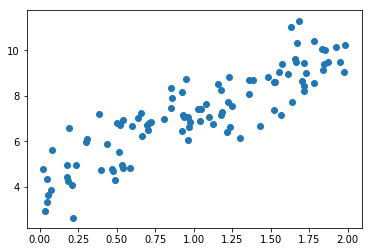

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2* np.random.rand(100,1)
y = 4+3 * X + np.random.randn(100,1)
plt.scatter(x=X, y=y )

In [11]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_best

array([[4.29146932],
       [2.87477002]])

In [13]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.29146932],
       [10.04100936]])

[0, 2, 0, 15]

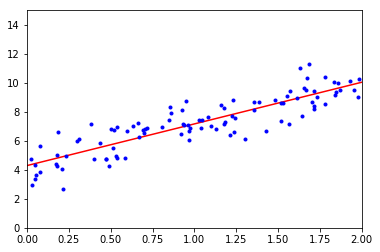

In [14]:
plt.plot(X_new,y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X,y)
lin_reg.predict(X_new)

array([[ 4.29146932],
       [10.04100936]])

# Gradient Descent Theory

# Learning Curves

In [18]:
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

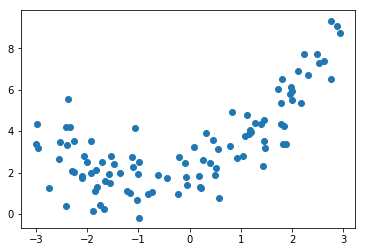

In [31]:
plt.scatter(X,y)

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train [:m])
        
        #Train on incrementally increasing training set
        y_train_predict = model.predict(X_train[:m])
        
        #Always test on entire val set
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train" )
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()

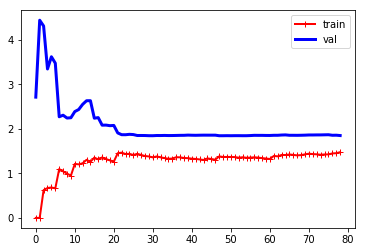

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

This curve illustrates what an underfitting model looks like. Adding additional data would not reduce errors. 

Use a 10th degree polynomial this time

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])


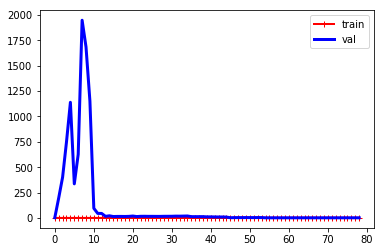

In [28]:
plot_learning_curves(polynomial_regression, X, y)

# Regularized linear models

Ridge Regression using closed form solution

In [29]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.6366615]])

In [33]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3.67165959])

Lasso Regression

In [34]:
from sklearn.linear_model import Lasso

In [35]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.58636938])

In [36]:
from sklearn.linear_model import ElasticNet

In [37]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.59244012])

# Early Stopping; A Regularization Technique

In [51]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start = True, penalty=None,
                      learning_rate = "constant", eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    #Fit continues training from where it left off since 'warm_start'
    #is set to true
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_predictions = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_predictions)
    if val_error < minimum_val_error:
        best_epoch = epoch
        best_model = clone(sgd_reg)
    


/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed whe

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: Deprec

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: Deprec

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: Deprec

In [52]:
best_model

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=None, n_iter=1, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)

# Decision Boundaries with IRIS EXAMPLE

In [53]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['DESCR', 'data', 'feature_names', 'target_names', 'target']

In [54]:
X = iris['data'][:,3:] #Only use pedal width to keep it simple
y = (iris['target'] == 2) #Only classify Virginica or not Virginica

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
print(y_proba[1])
print(log_reg.classes_)
#plt.plot(X_new,y_proba)

[0.98541511 0.01458489]
[False  True]


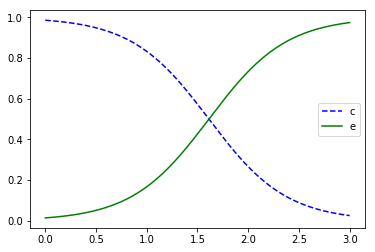

In [66]:
plt.plot(X_new, y_proba[:,0], "b--", label="Not Virginica")
plt.plot(X_new, y_proba[:,1], "g-", label="Virginica")
plt.legend("center right")
plt.show()

In [67]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

# Softmax Regression

In [69]:
X = iris["data"][:,(2,3)] #using pedal length and width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
softmax_reg.predict([[5,2]])

array([2])

In [71]:
softmax_reg.classes_

array([0, 1, 2])

In [72]:
softmax_reg.predict_proba([[5,2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])